# Metadata

* Title: DS5100 Final Project
* Class: DS 5100
* Date: 4 December 2022
* Student Name: Kristen Rose
* Student Net ID: krr4de
* This URL: https://github.com/kristenrose01/DS5100-Final-Project/blob/main/final-project-submission.ipynb
* GitHub Repo URL: https://github.com/kristenrose01/DS5100-Final-Project

# The Monte Carlo Module

In [ ]:
import numpy as np
import pandas as pd
import random

class Die:
    
    """
    A class to build, roll, and show a die.
    
    ---- 
    
    Methods
    
    change_weight(face_value, new_weight):
        Used to change the weight of a single face of a die.
        
    roll_die(number_rolls):
        Used to roll the die one or more times.
        
    show_die():
        Used to show die's current set of faces and weights.

    """   

    def __init__(self, faces):
        
        """
        Initializes die object.
        
        ----
        
        Parameters
            faces (array): A numpy array of strings or numbers
            
        Returns
            None
        
        """

        if (faces.dtype != '<U1') and (faces.dtype != 'int64') and (faces.dtype != 'float64'):
            raise TypeError("Array must contain strings or numbers.")
 
        if len(faces) != len(np.unique(faces)):
            raise ValueError("Faces must be unique; no duplicates.")
            
        weights = []
        
        for i in faces:
            weights.append(1.0)
        
        self._die = pd.DataFrame({"faces":faces, "weights":weights})

    def change_weight(self, face_value, new_weight):
        
        """
        Changes the weight of a single face of a die.
        
        ----
        
        Parameters
            face_value (str, int, or float): String, integer, or float value from array of faces
            new_weight (int or float): Integer or float of new weight for face
            
        Returns
            None
        
        """
        
        if face_value not in list(self._die["faces"]):
            raise ValueError("Face is not valid.")
            
        if type(new_weight) == int:
            float(new_weight)
        elif (type(new_weight) != float):
            raise TypeError("New weight is not valid.")
            
        index = self._die[self._die['faces']==face_value].index.values
        self._die.loc[index, 'weights'] = new_weight

    def roll_die(self, number_rolls=1):
       
        """
        Rolls the die one or more times.
        
        ----
        
        Parameters
            number_rolls (int): Number of times to roll die
            
        Returns
            List of outcomes
        
        """
        
        return random.choices(self._die["faces"], self._die['weights'], k=number_rolls)
        
    def show_die(self):
        
        """
        Shows die's current set of faces and weights.
        
        ----
        
        Parameters
            None
            
        Returns
            dataframe of die's faces and weights
        
        """
        
        return self._die
    
class Game:
    
    """
    A class to conduct a game of rolling one or more dice of the same kind one or more times.
    
    ---- 
    
    Methods
    
    play_game(number_rolls):
        Used to roll one or more dice a specified number of times.
        
    show_results(form='wide'):
        Used to show results of the most recent game played.
        
    """    
    
    def __init__(self, die_list):
        
        """
        Initializes game object.
        
        ----
        
        Parameters
            die_list (list): List of die objects
            
        Returns
            None
        
        """
            
        self.die_list = die_list   
                    
        for i in range(0, len(self.die_list)):
            if sorted(self.die_list[i]._die['faces'].tolist()) != sorted(self.die_list[0]._die['faces'].tolist()):
                raise ValueError("Die objects do not have same number of sides and set of faces.")
            
            
    def play_game(self, number_rolls):

        """
        Rolls one or more dice a specified number of times.
        
        ----
        
        Parameters
            number_rolls (int): Number of times to roll die
            
        Returns
            None
        
        """
        
        self._result = pd.DataFrame()
        self._result.index.names = ['Roll']
        
        for i in range(0, len(self.die_list)):
            die = self.die_list[i]
            self._result[i] = die.roll_die(number_rolls)
            
        for j in range(0, len(self._result)):
            label = "{number}".format(number = (j+1))
            self._result = self._result.rename(index = {j: label})
        

    def show_results(self, form='wide'):
        
        """
        Shows results of most recent game played.
        
        ----
        
        Parameters
            form (str): Form of dataframe to return ('wide' or 'narrow'). Default is wide. 
            
        Returns
            dataframe of results
        
        """
            
        if form=='wide': 
            return self._result
        elif form=='narrow':
            return self._result.stack()
        else:
            raise ValueError("Form is not valid.")

class Analyzer:
    
    """
    A class to analyze results and compute descriptive properties about a single game.
    
    ---- 
    
    Attributes

    face_counts: dataframe
        number of times a given face appeared in each roll
    
    jackpot: dataframe
        times a roll resulted in all faces being the same
        
    combo: dataframe
        combination types of faces that were rolled and their counts
        
    permutations: int
        number of sequence types rolled
            
    ---- 
    
    Methods
    
    face_counts():
        Used to compute how many times a given face is rolled in each roll.
        
    jackpot():
        Used to compute how many times the game resulted in all faces being identical.
        
    combo():
        Used to compute the distinct combinations of faces rolled, along with their counts.
        
    """    
    
    def __init__(self,game):
        
        """
        Initializes analyzer object.
        
        ----
        
        Parameters
            game (Class object): Object from Game class to analyze.
            
        Returns
            None
        
        """
        
        self._game = game
        
        self.permutation = len(self._game._result.apply(lambda x: pd.Series(x).sort_values(), axis=1).value_counts().to_frame('n').sort_index())
        
    
    def face_counts(self):
        
        """
        Computes how many times a given face is rolled in each roll.
        
        ----
        
        Parameters
            None
            
        Returns
            Dataframe of the number of times a given face appeared in each roll
        
        """
        
        Analyzer.face_counts = self._game._result.apply(pd.Series.value_counts, axis=1).fillna(0).astype(int).rename_axis(columns = 'Face')
        return Analyzer.face_counts
    
    def jackpot(self):
                
        """
        Computes how many times the game resulted in all faces being identical.
        
        ----
        
        Parameters
            None
            
        Returns
            Integer of number of times the game resulted in all faces being identical.
        
        """
        
        self.jackpot = self._game._result[self._game._result.nunique(axis=1) == 1]
        jackpot_num = len(self.jackpot)
     
        return jackpot_num
    
    def combo(self):
        
        """
        Computes the distinct combinations of faces rolled, along with their counts.
        
        ----
        
        Parameters
            None
            
        Returns
            Dataframe of the distinct combinations of faces rolled, along with their counts
        
        """
        
        self.combo = self._game._result.apply(lambda x: pd.Series(x).sort_values(), axis=1).value_counts().to_frame('n').sort_index()
    
        return self.combo

# Test Module

In [ ]:
import unittest
from montecarlo.montecarlo import Die
from montecarlo.montecarlo import Game
from montecarlo.montecarlo import Analyzer
import pandas as pd
import numpy as np
import random

class DieTestCase(unittest.TestCase):
    
    """
    A class to test the Die class in the montecarlo module.
    
    ---- 
    
    Methods
    
    test_1_init_die_pass():
        Tests successful use of the initializer method.
        
    test_2_init_die_fail():
        Tests exception raise of the initializer method.
        
    test_3_change_weight():
        Tests successful use of the change_weight() method.
        
    test_4_roll_die():
        Tests successful use of the roll_die() method.
        
    test_5_show_die():
        Tests successful use of the show_die() method.

    """   
    
    def test_1_init_die_pass(self):
               
        """
        Tests successful use of the initializer method.
        
        ----
        
        Parameters
            None
            
        Returns
            None
        
        """
        
        die1 = Die(np.array([1,2,3,4,5,6]))
        actual = die1._die
        
        expected = pd.DataFrame({'faces':np.array([1,2,3,4,5,6]), 'weights':np.ones(6)})
        
        self.assertTrue(actual.equals(expected), "Die is initialized correctly.")
        
    def test_2_init_die_fail(self):
        
        """
        Tests exception raise of the initializer method.
        
        ----
        
        Parameters
            None
            
        Returns
            None
        
        """
            
        with self.assertRaises(ValueError):  
            die1 = Die(np.array([1,1,2,3,4,5]))
    
    def test_3_change_weight(self): 
                
        """
        Tests successful use of the change_weight() method.
        
        ----
        
        Parameters
            None
            
        Returns
            None
        
        """
        
        die1 = Die(np.array([1,2,3,4,5,6]))
        die1.change_weight(4, 2.0)
        
        self.assertTrue(2.0 in die1._die['weights'].values, "Weight not changed.")
        
    def test_4_roll_die(self):
        
        """
        Tests successful use of the roll_die() method.
        
        ----
        
        Parameters
            None
            
        Returns
            None
        
        """
            
        die1 = Die(np.array([1,2,3,4,5,6]))
        expected = die1.roll_die(4)
        
        self.assertEqual(4, len(expected), "Die rolled incorrectly.")
        
    def test_5_show_die(self):
        
        """
        Tests successful use of the show_die() method.
        
        ----
        
        Parameters
            None
            
        Returns
            None
        
        """
            
        die1 = Die(np.array([1,2,3,4,5,6]))
        actual = die1.show_die()
        
        faces = np.array([1,2,3,4,5,6])
        weights = np.ones(6)
        expected = pd.DataFrame({'faces':faces,'weights':weights})
        
        self.assertTrue(actual.equals(expected), "Die is not shown.")
         
class GameTestCase(unittest.TestCase):
        
    """
    A class to test the Game class in the montecarlo module.
    
    ---- 
    
    Methods
    
    test_6_init_pass():
        Tests successful use of the initializer method.
        
    test_7_init_fails():
        Tests exception raise of the initializer method.
        
    test_8_play_game():
        Tests successful use of the play_game() method.
        
    test_9_show_results_wide():
        Tests successful use of the show_results() method for a wide dataframe.
        
    test_10_show_results_narrow():
        Tests successful use of the show_results() method for a narrow dataframe.
        
    """   
    
    def test_6_init_pass(self):
        
        """
        Tests successful use of the initializer method.
        
        ----
        
        Parameters
            None
            
        Returns
            None
        
        """
            
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        
        game1 = Game([die1, die2])
        
        self.assertTrue(game1.die_list == [die1, die2])
        
    def test_7_init_fails(self):
                
        """
        Tests exception raise of the initializer method.
        
        ----
        
        Parameters
            None
            
        Returns
            None
        
        """
        
        with self.assertRaises(ValueError):
            die1 = Die(np.array([1,2,3,4,5,6]))
            die2 = Die(np.array(['a','b','c','d','e','f']))
        
            game1 = Game([die1, die2])
    
    def test_8_play_game(self):
        
        """
        Tests successful use of the play_game() method.
        
        ----
        
        Parameters
            None
            
        Returns
            None
        
        """
        
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        
        game1 = Game([die1, die2])
        game1.play_game(4)
        actual = game1._result.size
        
        self.assertEqual(actual, 8, "Game not played correctly.") 
        
    def test_9_show_results_wide(self):
        
        """
        Tests successful use of the show_results() method for a wide dataframe.
        
        ----
        
        Parameters
            None
            
        Returns
            None
        
        """
            
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        
        game1 = Game([die1, die2])
        game1.play_game(4)
        actual = game1.show_results().shape
        expected = (4, 2)
        
        self.assertEqual(actual, expected, "Results not shown accurately.")
        
    def test_10_show_results_narrow(self):
        
        """
        Tests successful use of the show_results() method for a narrow dataframe.
        
        ----
        
        Parameters
            None
            
        Returns
            None
        
        """
            
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        
        game1 = Game([die1, die2])
        game1.play_game(4)
        actual = game1.show_results(form='narrow').shape
        expected = (8,)
    
        self.assertEqual(actual, expected, "Results not shown accurately.")
        
class AnalyzerTestCase(unittest.TestCase):
    
    """
    A class to test the Analyzer class in the montecarlo module.
    
    ---- 
    
    Methods
    
    test_11_init_pass():
        Tests successful use of the initializer method.
        
    test_12_face_counts():
        Tests successful use of the face_counts() method.
        
    test_13_jackpot():
        Tests successful use of the jackpot() method.
        
    test_14_combo():
        Tests successful use of the combo() method.
        
    """ 
    
    def test_11_init_pass(self):
        
        """
        Tests successful use of the initializer method.
        
        ----
        
        Parameters
            None
            
        Returns
            None
        
        """
        
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        
        game1 = Game([die1, die2])
        game1.play_game(4)
        analyzer1 = Analyzer(game1)
        
        self.assertTrue(len(analyzer1._game.die_list) == 2, "Analyzer not initialized correctly.")
        
    def test_12_face_counts(self):
                
        """
        Tests successful use of the face_counts() method.
        
        ----
        
        Parameters
            None
            
        Returns
            None
        
        """
        
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        
        game1 = Game([die1, die2])
        game1.play_game(4)
        analyzer1 = Analyzer(game1)
        analyzer1.face_counts()
        actual = analyzer1.face_counts.values.sum()
        expected = 8
        
        self.assertEqual(actual, expected, "Face counts are not displayed accurately.")
        
    def test_13_jackpot(self):
        
        """
        Tests successful use of the jackpot() method.
        
        ----
        
        Parameters
            None
            
        Returns
            None
        
        """
        
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        
        game1 = Game([die1, die2])
        game1.play_game(4)
        analyzer1 = Analyzer(game1)
        
        actual = analyzer1.jackpot()
        expected = len(analyzer1.jackpot)
        
        self.assertEqual(actual, expected, "Jackpot number is not accurate.")
        
    def test_14_combo(self):
                
        """
        Tests successful use of the combo() method.
        
        ----
        
        Parameters
            None
            
        Returns
            None
        
        """
        
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        
        game1 = Game([die1, die2])
        game1.play_game(4)
        analyzer1 = Analyzer(game1)
        analyzer1.combo()
        
        actual = analyzer1.combo.values.sum()
        expected = 4
        
        self.assertEqual(actual, expected, "Total number of rolls is not accurate.")
        
if __name__ == '__main__':

    unittest.main()

# Test Results

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

In [1]:
# FOR ALL SCENARIOS
from montecarlo.montecarlo import Die
from montecarlo.montecarlo import Game
from montecarlo.montecarlo import Analyzer
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Scenario 1

In [2]:
fair_coin1 = Die(np.array(['H','T']))
unfair_coin1 = Die(np.array(['H','T']))
unfair_coin1.change_weight('T', 5)

In [3]:
fair_game_list = [fair_coin1, fair_coin1, fair_coin1]
unfair_game_list = [unfair_coin1, unfair_coin1, fair_coin1]

In [4]:
fair_game = Game(fair_game_list)
fair_game.play_game(1000)

In [5]:
unfair_game = Game(unfair_game_list)
unfair_game.play_game(1000)

In [6]:
fair_game_analysis = Analyzer(fair_game)
unfair_game_analysis = Analyzer(unfair_game)

In [17]:
fair_game_analysis.jackpot()

229

In [18]:
unfair_game_analysis.jackpot()

381

In [19]:
freq_fair_game = len(fair_game_analysis.jackpot)/1000
print(freq_fair_game)

0.229


In [20]:
freq_unfair_game = len(unfair_game_analysis.jackpot)/1000
print(freq_unfair_game)

0.381


In [21]:
df = pd.DataFrame({'Game Played': ['Fair Game', 'Unfair Game'], 'Relative Frequency of Jackpots': [freq_fair_game, freq_unfair_game]})
df

,Game Played,Relative Frequency of Jackpots
0,Fair Game,0.229
1,Unfair Game,0.381


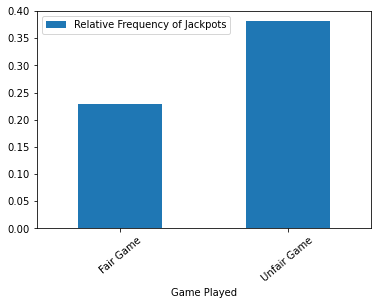

In [22]:
fig, ax = plt.subplots()
df.plot.bar(x = 'Game Played', y = 'Relative Frequency of Jackpots', rot = 40, ax = ax);

## Scenario 2

In [11]:
fair_die1 = Die(np.array([1,2,3,4,5,6]))
unfair_die1 = Die(np.array([1,2,3,4,5,6]))
unfair_die2 = Die(np.array([1,2,3,4,5,6]))

In [12]:
unfair_die1.change_weight(6, 5)
unfair_die2.change_weight(1, 5)

In [13]:
game1_list = [fair_die1, fair_die1, fair_die1, fair_die1, fair_die1]
game2_list = [unfair_die1, unfair_die1, unfair_die2, fair_die1, fair_die1]

In [14]:
game1 = Game(game1_list)
game1.play_game(10000)

In [15]:
game2 = Game(game2_list)
game2.play_game(10000)

In [16]:
game1_analysis = Analyzer(game1)
game2_analysis = Analyzer(game2)

In [17]:
game1_analysis.jackpot()

12

In [18]:
game2_analysis.jackpot()

4

In [19]:
freq_game1 = len(game1_analysis.jackpot)/10000
print(freq_game1)

0.0012


In [20]:
freq_game2 = len(game2_analysis.jackpot)/10000
print(freq_game2)

0.0004


In [21]:
df2 = pd.DataFrame({'Game Played': ['Fair Game', 'Unfair Game'], 'Relative Frequency of Jackpots': [freq_game1, freq_game2]})
df2

,Game Played,Relative Frequency of Jackpots
0,Fair Game,0.0012
1,Unfair Game,0.0004


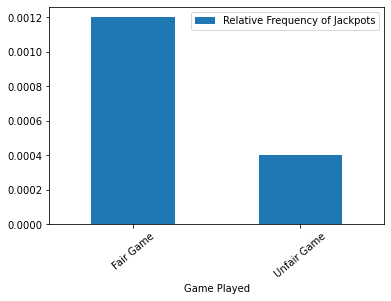

In [22]:
fig, ax = plt.subplots()
df2.plot.bar(x = 'Game Played', y = 'Relative Frequency of Jackpots', rot = 40, ax = ax);

In [23]:
game1_analysis.combo()

n
0 1 2 3 4   
1 1 1 1 1  1
        2  1
        4  3
        6  2
      2 1  4
...       ..
6 6 6 5 6  3
      6 3  4
        4  4
        5  1
        6  3

[5615 rows x 1 columns]

In [24]:
game2_analysis.combo()

n
0 1 2 3 4   
1 1 1 1 1  1
        3  2
        4  2
        5  1
      2 1  2
...       ..
6 6 6 6 2  5
        3  5
        4  8
        5  9
        6  3

[3697 rows x 1 columns]

In [25]:
df3 = game1_analysis.combo.sort_values(by='n',ascending=False).head(n=10)
lst_die = list(df3.index.values)
lst_counts = list()
df4 = df3.reset_index()
for i in range(len(df4)):
    lst_counts.append(df4['n'][i])
graph_df = pd.DataFrame({'Die Combination':lst_die, 'Counts':lst_counts})

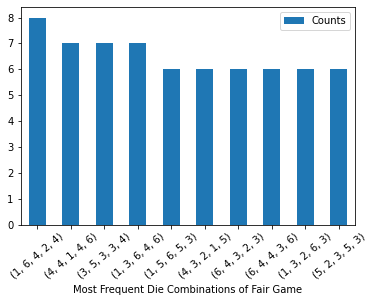

In [26]:
fig, ax = plt.subplots()
plt1 = graph_df.plot.bar(x = 'Die Combination', y = 'Counts', rot = 40, ax = ax);
plt1.set_xlabel('Most Frequent Die Combinations of Fair Game');

In [27]:
df5 = game2_analysis.combo.sort_values(by='n',ascending=False).head(n=10)
lst_die2 = list(df5.index.values)
lst_counts2 = list()
df6 = df5.reset_index()
for i in range(len(df6)):
    lst_counts2.append(df6['n'][i])
graph_df2 = pd.DataFrame({'Die Combination':lst_die2, 'Counts':lst_counts2})

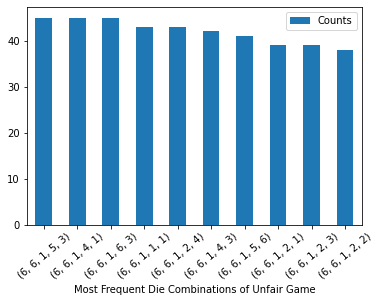

In [28]:
fig, ax = plt.subplots()
plt2 = graph_df2.plot.bar(x = 'Die Combination', y = 'Counts', rot = 40, ax = ax)
plt2.set_xlabel('Most Frequent Die Combinations of Unfair Game');

## Scenario 3

In [41]:
letter_die = Die(np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']))

In [42]:
letter_die.change_weight('A', 8.4966)
letter_die.change_weight('B', 2.0720)
letter_die.change_weight('C', 4.5388)
letter_die.change_weight('D', 3.3844)
letter_die.change_weight('E', 11.1607)
letter_die.change_weight('F', 1.8121)
letter_die.change_weight('G', 2.4705)
letter_die.change_weight('H', 3.0034)
letter_die.change_weight('I', 7.5448)
letter_die.change_weight('J', 0.1965)
letter_die.change_weight('K', 1.1016)
letter_die.change_weight('L', 5.4893)
letter_die.change_weight('M', 3.0129)
letter_die.change_weight('N', 6.6544)
letter_die.change_weight('O', 7.1635)
letter_die.change_weight('P', 3.1671)
letter_die.change_weight('Q', 0.1962)
letter_die.change_weight('R', 7.5809)
letter_die.change_weight('S', 5.7351)
letter_die.change_weight('T', 6.9509)
letter_die.change_weight('U', 3.6308)
letter_die.change_weight('V', 1.0074)
letter_die.change_weight('W', 1.2899)
letter_die.change_weight('X', 0.2902)
letter_die.change_weight('Y', 1.7779)
letter_die.change_weight('Z', 0.2722)

In [350]:
list_letter_die = [letter_die, letter_die, letter_die, letter_die, letter_die]

In [414]:
letter_game = Game(list_letter_die)
letter_game.play_game(1000)

In [415]:
results = letter_game.show_results()

In [416]:
# Sample 1
results.sample(n=10)

,0,1,2,3,4
Roll,,,,,
41,E,P,R,N,R
140,I,O,C,O,D
500,C,D,E,R,R
222,I,I,E,C,F
268,V,S,H,S,E
494,A,B,L,A,M
845,I,V,Y,N,M
713,E,I,E,T,E
38,O,D,A,H,E


In [417]:
word_count = 0

In [418]:
# Sample 2
results.sample(n=10)

,0,1,2,3,4
Roll,,,,,
380,T,M,E,A,Q
607,B,I,U,U,L
708,F,E,I,E,R
480,I,F,U,S,A
367,T,O,E,L,P
167,L,E,A,S,T
282,U,N,A,A,J
327,N,N,I,E,H
770,T,I,I,N,L


In [419]:
word_count = 1 #least

In [420]:
# Sample 3
results.sample(n=10)

,0,1,2,3,4
Roll,,,,,
831,T,O,N,M,C
940,I,U,E,I,C
428,D,A,O,P,P
981,N,H,V,C,G
261,S,D,R,E,C
243,I,K,O,N,R
492,R,T,P,H,M
612,E,U,G,T,N
884,U,A,C,G,O


In [421]:
word_count += 0

In [422]:
# Sample 4
results.sample(n=10)

,0,1,2,3,4
Roll,,,,,
841,N,A,L,A,C
203,E,L,T,D,O
601,I,R,G,S,W
599,U,E,C,E,T
547,U,S,D,R,G
383,A,V,R,E,S
364,P,D,R,B,C
372,O,I,S,T,E
178,P,H,D,N,C


In [423]:
word_count += 0

In [424]:
# Sample 5
results.sample(n=10)

,0,1,2,3,4
Roll,,,,,
236,R,E,T,P,U
875,I,F,H,T,B
582,U,C,D,E,E
92,E,E,L,A,T
547,U,S,D,R,G
768,N,D,V,R,R
120,L,C,G,E,Y
285,W,E,I,Z,M
835,L,E,T,E,N


In [425]:
word_count += 0

In [426]:
# Sample 6
results.sample(n=10)

,0,1,2,3,4
Roll,,,,,
383,A,V,R,E,S
712,O,E,L,Y,R
822,C,A,L,P,S
441,T,C,R,O,C
407,N,O,A,C,R
781,I,D,I,A,D
517,O,H,C,Y,F
439,R,E,W,E,N
844,O,R,E,R,S


In [427]:
word_count += 0

In [428]:
# Sample 7
results.sample(n=10)

,0,1,2,3,4
Roll,,,,,
706,M,E,O,S,R
958,U,W,D,I,O
217,R,G,S,P,F
269,E,L,A,E,P
382,O,G,I,K,E
39,N,N,W,N,E
611,C,B,U,D,B
939,S,N,T,R,D
886,E,C,N,O,E


In [429]:
word_count += 0

In [430]:
# Sample 8
results.sample(n=10)

,0,1,2,3,4
Roll,,,,,
574,C,U,E,S,S
806,Q,E,E,M,M
440,I,C,A,S,O
582,U,C,D,E,E
24,B,P,A,I,O
611,C,B,U,D,B
227,T,A,R,S,O
316,L,U,S,A,F
425,C,O,A,S,R


In [431]:
word_count += 0

In [432]:
# Sample 9
results.sample(n=10)

,0,1,2,3,4
Roll,,,,,
314,E,E,M,M,E
575,P,P,L,E,T
31,A,Y,S,L,N
836,O,I,N,M,T
892,O,O,O,C,G
97,U,E,T,F,M
437,E,R,A,E,D
238,R,R,E,R,E
870,U,I,A,O,M


In [433]:
word_count += 0

In [434]:
# Sample 10
results.sample(n=10)

,0,1,2,3,4
Roll,,,,,
119,S,L,U,H,S
466,T,I,P,R,T
42,N,B,L,S,A
347,R,T,E,Y,R
88,R,C,Y,R,B
645,M,R,V,U,E
385,N,A,I,T,S
445,A,E,V,R,I
494,A,B,L,A,M


In [435]:
word_count += 0

In [436]:
estimate = word_count/100
print(f"Based on the 10 random samples above, the estimated percent of English words in the data is {estimate}%")

Based on the 10 random samples above, the estimated percent of English words in the data is 0.01%


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [29]:
!ls -lRF -o

.:
total 264
-rw-r--r-- 1 krr4de 137869 Dec  6 21:08 final-project-submission.ipynb
-rw-r--r-- 1 krr4de   7048 Nov 28 20:04 LICENSE
drwxr-sr-x 4 krr4de   3072 Dec  6 21:00 montecarlo/
-rw-r--r-- 1 krr4de  76774 Dec  6 21:05 montecarlo_demo.ipynb
drwxr-sr-x 2 krr4de   2048 Dec  3 22:13 montecarlo.egg-info/
drwxr-sr-x 2 krr4de    512 Dec  3 19:30 __pycache__/
-rw-r--r-- 1 krr4de   4107 Dec  6 21:04 README.md
-rw-r--r-- 1 krr4de    340 Dec  3 20:56 setup.py
drwxr-sr-x 3 krr4de   1536 Dec  6 21:03 tests/

./montecarlo:
total 40
-rw-r--r-- 1 krr4de    0 Dec  3 19:45 __init__.py
-rw-r--r-- 1 krr4de  109 Dec  3 20:57 __init__.pyc
-rw-r--r-- 1 krr4de 7861 Dec  6 21:00 montecarlo.py
-rw-r--r-- 1 krr4de 8617 Dec  3 20:57 montecarlo.pyc
drwxr-sr-x 2 krr4de 1024 Dec  6 21:01 __pycache__/

./montecarlo/__pycache__:
total 20
-rw-r--r-- 1 krr4de  181 Dec  3 20:45 __init__.cpython-38.pyc
-rw-r--r-- 1 krr4de 8364 Dec  6 21:01 montecarlo.cpython-38.pyc

./montecarlo.egg-info:
total 16
-rw-r--r-- 1 krr4d

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [438]:
!pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/krr4de/Documents/MSDS/DS5100/DS5100-Final-Project
  Attempting uninstall: montecarlo
    Found existing installation: montecarlo 0.1
    Uninstalling montecarlo-0.1:
      Successfully uninstalled montecarlo-0.1
  Running setup.py develop for montecarlo
